<a href="https://colab.research.google.com/github/johnnycleiton07/llm-studies/blob/main/Implementa%C3%A7%C3%A3o_de_rede_neural_com_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criação de Rede Neural para PLN com Embeddings

Fazer uma rede neural com embeddings significa usar representações densas e contínuas de palavras ou tokens em um espaço de alta dimensão, onde palavras com significados semelhantes têm representações semelhantes. Essas representações são conhecidas como embeddings, **é basicamente a representação de objetos do mundo real, como palavras, imagens ou vídeos, em uma forma que os computadores podem processar.**

* Este tutorial aborda a construção de uma rede neural para classificar mensagens de spam. O processo inclui preparação de dados, definição da arquitetura da rede, treinamento e avaliação do modelo.



##Importação de bibliotecas e upload do dataset

Nesta etapa, são importadas todas as bibliotecas necessárias para o projeto, como pandas, numpy, e ferramentas específicas do sklearn e Keras, como `Flatten` e `Embeddings`, essencial para transformar dados categóricos (como palavras) em vetores densos e contínuos. Também é feito o upload do dataset "spam.csv" para o ambiente de trabalho.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
#importando o arquivo csv
from google.colab import files
files.upload()

Saving spam.csv to spam.csv


{'spam.csv': b'Category,Message\r\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."\r\nham,Ok lar... Joking wif u oni...\r\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s\r\nham,U dun say so early hor... U c already then say...\r\nham,"Nah I don\'t think he goes to usf, he lives around here though"\r\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, \xc2\xa31.50 to rcv"\r\nham,Even my brother is not like to speak with me. They treat me like aids patent.\r\nham,As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\r\nspam,WINNER!! As a valued network customer you have been selected to receivea \xc2\xa3900

In [3]:
#visualizando o dataset
spam = pd.read_csv("spam.csv")
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


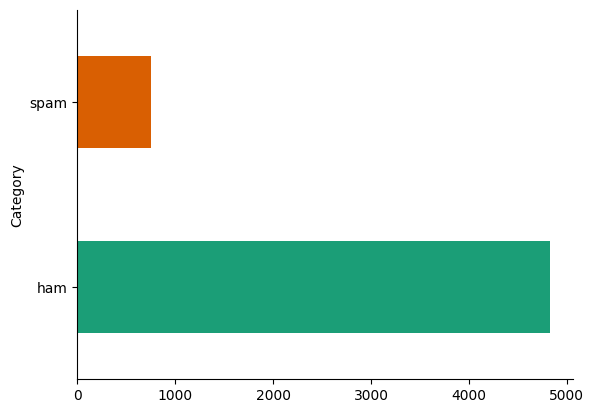

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
spam.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Pré-processamento dos dados

As categorias de texto foram transformadas em números utilizando `LabelEncoder()` para que os algoritmos de machine learning possam processá-las corretamente. `fit_transform` faz a transformação dos dados para que as máquinas consigam ler e interpretar

In [4]:
#transformar as categorias em número para que as máquinas entendam

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(spam['Category'])
print(y)

[0 0 1 ... 0 0 0]


##Divisão em conjunto de treino e teste

O dataset foi dividido em conjuntos de **treino** e **teste** usando `train_test_split()` do scikit-learn. `X_train` e `X_test` são as partes dos dados de entrada para treinamento e teste, respectivamente. Já `y_train` e `y_test` são as partes das classes (spam ou não spam) para treinamento e teste, respectivamente.

* `test_size=0.3` indica que 30% dos dados serão usados para teste e 70% para treinamento.

Essa divisão em treino e teste é essencial para avaliar a performance do modelo em dados não vistos durante o treinamento.

In [5]:
mensagens = spam['Message'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3)
print(X_train)

['K...k...when will you give treat?'
 'Goodnight, sleep well da please take care pa. Please.'
 "Nope i'm not drivin... I neva develop da photos lei..." ...
 'Saw Guys and Dolls last night with Patrick Swayze it was great'
 'aathi..where are you dear..'
 "Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'"]


##Tokenização das mensagens de texto

A tokenização é o processo de transformar texto em números, onde cada palavra ou token é convertido em um índice numérico. A classe `Tokenizer` do Keras é usada para ajustar o tokenizador ao conjunto de treino `X_train`, limitando o vocabulário a 1000 palavras mais frequentes.

Em seguida, as sequências de texto de `X_train` e `X_test` são transformadas em sequências de índices, preparando os dados textuais para serem usados como entrada para a rede neural.

In [6]:
#tokenização, transoformando as palavras em números
token = Tokenizer(num_words=1000)
token.fit_on_texts(X_train)

X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

* Os comandos abaixo imprimem o comprimento do conjunto de treino tokenizado e as próprias sequências tokenizadas, mostrando quantas amostras há no conjunto de treino e como as frases foram convertidas em índices numéricos.

In [8]:
print(len(X_train))
print(X_train)

3900
[[88, 88, 43, 28, 3, 138, 645], [928, 236, 132, 87, 98, 101, 180, 402, 98], [832, 36, 25, 1, 502, 87, 538], [139, 17, 60, 15, 5, 111, 253], [377, 833, 41, 389, 81, 9, 13, 604, 65, 52, 152, 834, 477, 149, 191, 414, 4, 835, 3], [1, 92, 573, 83, 2, 21, 57], [44, 86, 7], [105, 10, 241, 3, 8, 573, 53, 50, 2, 30, 21], [46, 23, 212, 187], [353, 73, 2, 171, 42, 150], [14, 605, 929, 157], [26, 67], [1, 96, 58, 53, 2, 35, 2, 57, 52, 15, 40, 23, 63, 64, 140, 930, 55, 40, 96, 10], [123, 574, 18, 2, 135, 13, 279, 378, 145, 26, 646, 478, 323, 2, 4, 267, 723, 21], [44, 688, 9, 106, 2, 26, 31], [6, 286, 20, 171, 10], [155, 31, 606, 221, 7, 300, 61, 146, 5, 390, 74], [61, 34, 30, 4], [31, 66, 4, 70, 503, 112], [167, 46, 77, 363], [118, 29, 3, 105, 10, 647, 648, 479, 10, 2, 153, 116, 69, 24, 1, 54, 7, 391, 25, 192, 122], [1, 57, 93, 171, 78, 42, 57, 52, 778, 575, 34, 779], [24, 36, 102, 76, 29, 311, 168, 77], [124, 15, 50, 83, 2, 415, 40, 344, 136], [43, 3, 31, 453, 8, 5, 649, 11, 137, 7, 5, 28, 50

* O código a seguir ajusta o comprimento das sequências de texto tokenizadas para um comprimento fixo de 500, preenchendo com zeros onde necessário. Isso é essencial para garantir que todas as sequências tenham o mesmo tamanho, o que facilita o processamento pelo modelo de machine learning.

In [10]:
X_train = pad_sequences(X_train, padding="post", maxlen=500)
X_test = pad_sequences(X_test, padding="post", maxlen=500)

print(len(X_train))
print(X_train)

3900
[[ 88  88  43 ...   0   0   0]
 [928 236 132 ...   0   0   0]
 [832  36  25 ...   0   0   0]
 ...
 [460 327   7 ...   0   0   0]
 [126  22   3 ...   0   0   0]
 [ 12 100 675 ...   0   0   0]]


* Verificando o tamanho do vocabulário, ou seja, o número de palavras únicas que o Tokenizer ajustou nos dados de treino.

In [11]:
print(len(token.word_index))

7460




---


##Construção do modelo de Rede Neural

Aqui, é definida a arquitetura da rede neural utilizando o Keras. São adicionadas camadas densas com ativação ReLU e uma camada de saída com ativação sigmoid para classificação binária. O que também está incluído é o uso de embeddings para capturar relações semânticas entre palavras.

No código é criada uma camada no estilo de empilhamento em sequência (Sequential),

* No código é criada uma camada no estilo de empilhamento em sequência (`Sequential`), uma camada de embedding (`Embedding`) que transforma palavras em vetores densos de 50 dimensões, e uma camada de achatamento (`Flatten`) para converter os embeddings em um vetor unidimensional.

* Uma camada densa (`Dense`) com o número de neurônios na camada (`units`) e a função de ativação (`activation="relu"`).

* A camada de `Dropout` serve para evitar o overfiting.

* `Sigmoid` neste caso é usada na última camada pois mapeia qualquer valor de entrada para um valor entre 0 e 1, o que pode ser interpretado como uma probabilidade, pois no projeto estamos querendo saber se o email é spam ou não.



In [12]:
modelo = Sequential()
modelo.add(Embedding(input_dim=len(token.word_index), output_dim=50, input_length=500))
modelo.add(Flatten())

modelo.add(Dense(units=10, activation="relu"))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=1, activation="sigmoid"))

###Compilação e treinamento do modelo

O modelo é compilado com função de perda `"mean_squared_error"`, otimizador `"adam"` e métrica de `"accuracy"`. Depois, é treinado com os dados de treino, validando com os dados de teste.

In [13]:
#compilando o modelo, ou seja, preparando o modelo para o treinamento, configurando aspectos essenciais
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           373000    
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense (Dense)               (None, 10)                250010    
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 623021 (2.38 MB)
Trainable params: 623021 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#chamando o método fit para realizar o treinamento
modelo.fit(X_train, y_train, epochs=20, batch_size=10, verbose=True, validation_data=(X_test, y_test))

Epoch 1/20
390/390 [==============================] - 7s 16ms/step - loss: 0.0733 - accuracy: 0.9221 - val_loss: 0.0417 - val_accuracy: 0.9797
Epoch 2/20
390/390 [==============================] - 4s 11ms/step - loss: 0.0341 - accuracy: 0.9849 - val_loss: 0.0336 - val_accuracy: 0.9809
Epoch 3/20
390/390 [==============================] - 4s 11ms/step - loss: 0.0260 - accuracy: 0.9892 - val_loss: 0.0288 - val_accuracy: 0.9827
Epoch 4/20
390/390 [==============================] - 6s 15ms/step - loss: 0.0197 - accuracy: 0.9918 - val_loss: 0.0247 - val_accuracy: 0.9839
Epoch 5/20
390/390 [==============================] - 4s 12ms/step - loss: 0.0158 - accuracy: 0.9928 - val_loss: 0.0236 - val_accuracy: 0.9821
Epoch 6/20
390/390 [==============================] - 5s 14ms/step - loss: 0.0123 - accuracy: 0.9946 - val_loss: 0.0209 - val_accuracy: 0.9833
Epoch 7/20
390/390 [==============================] - 6s 16ms/step - loss: 0.0097 - accuracy: 0.9959 - val_loss: 0.0208 - val_accuracy: 0.9809

###Avaliação do modelo

Após o treinamento, é possível avaliar o modelo usando os dados de teste e calcular a perda e acurácia alcançada.

* Perda (`loss`): mede o quão bem o modelo está se saindo durante o treinamento, comparando suas previsões com os valores reais. Quanto menor a perda, melhor o modelo está performando.

* Acurácia (`accuracy`): mede a proporção de previsões corretas feitas pelo modelo. Quanto maior a acurácia, mais preciso é o modelo em suas previsões.

In [15]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Acurácia: ", accuracy)

53/53 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9850
Loss:  0.014224864542484283
Acurácia:  0.9850478172302246


O modelo treinado foi utilizado para fazer previsões com os dados de teste.

In [16]:
nova_previsao = modelo.predict(X_test)
print(nova_previsao) #o valor é retornado em números dentro de 0 e 1

53/53 [==============================] - 0s 3ms/step
[[1.9916127e-17]
 [3.0535078e-15]
 [1.3062296e-05]
 ...
 [1.7472490e-11]
 [9.9997181e-01]
 [1.0000000e+00]]


In [17]:
#melhorando a visualização do treinamento com True ou False

prev = (nova_previsao > 0.5)
print(prev)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


Matriz de Confusão: é uma tabela que mostra a performance do modelo ao comparar as previsões feitas com os rótulos reais.


* TN (True Negative): E-mails corretamente classificados como não spam.
* FP (False Positive): E-mails erroneamente classificados como spam.
* FN (False Negative): E-mails erroneamente classificados como não spam.
* TP (True Positive): E-mails corretamente classificados como spam.

|     | Não Spam | Spam   |
|-----|----------|--------|
| Não Spam | TN     | FP   |
| Spam   | FN     | TP     |

In [18]:
#gerando Matriz de Confusão
cm = confusion_matrix(y_test, prev)
print(cm)

[[1435    5]
 [  20  212]]
